In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib as mpl

In [2]:
con = sqlite3.connect('data/core.muri2.2.denorm.db')

In [3]:
# All subfamily hits (must hit a subfamily)
gh13_domain_all_features = pd.read_sql(r"""
    SELECT * FROM feature_x_cazy_domain
    JOIN feature_to_opf USING (feature_id)
    WHERE (
        domain_id LIKE 'GH13\_%' ESCAPE '\'
--        OR domain_id IS 'GH13'
        )
       AND score > 50
""", con=con).sort_values('feature_id')

/Users/byronsmith/anaconda3/envs/compbio/lib/python3.8/site-packages/seaborn/matrix.py:301: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  mesh = ax.pcolormesh(self.plot_data, vmin=self.vmin, vmax=self.vmax,


domain_id,GH13_1,GH13_10,GH13_13,GH13_14,GH13_15,GH13_19,GH13_2,GH13_20,GH13_25,GH13_28,GH13_36,GH13_37,GH13_38,GH13_42,GH13_5,GH13_6,GH13_7,GH13_8
opf_id,,,,,,,,,,,,,,,,,,
Opf00581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130
Opf00668,0,0,0,0,0,0,0,0,0,0,0,0,136,0,0,0,0,0
Opf00790,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
Opf00838,0,0,113,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Opf00965,0,92,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Opf01163,0,0,0,0,0,0,0,0,0,102,0,0,0,0,0,0,0,0
Opf01338,0,0,0,0,0,0,0,5,0,0,62,0,0,0,0,0,0,0
Opf01765,3,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0,0
Opf01860,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0


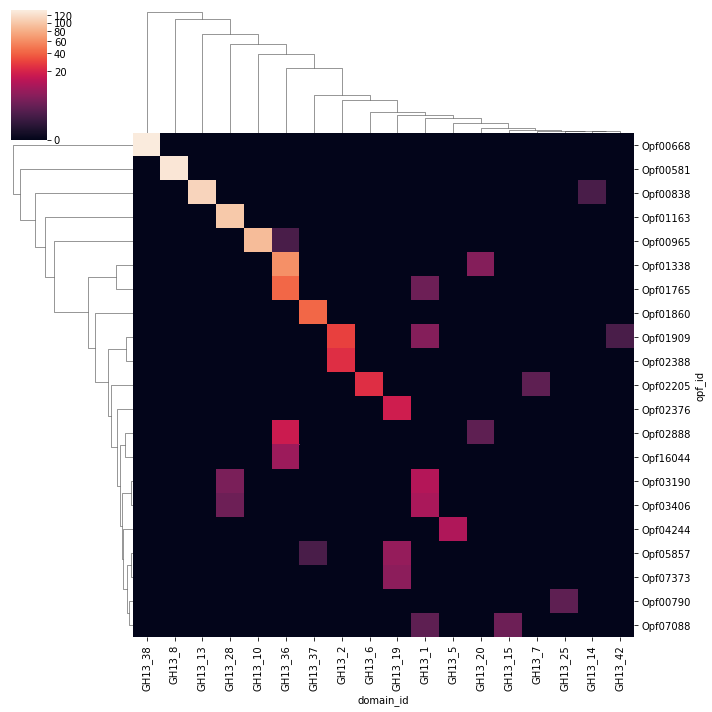

In [4]:
opf_to_gh13_subfamily_feature_counts = (
    gh13_domain_all_features
    .groupby('feature_id').opf_id.first().to_frame()
    .join(
        gh13_domain_all_features
        .groupby('feature_id')
        .apply(lambda d: d.set_index('domain_id').score.idxmax())
        .rename('domain_id')
    )
    .groupby(['opf_id', 'domain_id'])
    .apply(len)
)

sns.clustermap(
    opf_to_gh13_subfamily_feature_counts.unstack(fill_value=0),
    norm=mpl.colors.PowerNorm(1/3),
    yticklabels=1,
)

opf_to_gh13_subfamily_feature_counts.unstack(fill_value=0)

In [5]:
# All GH13 family or subfamily best hits.
gh13_domain_features = pd.read_sql(r"""
    SELECT * FROM feature_x_cazy_minimal_domain
    JOIN feature_to_opf USING (feature_id)
    WHERE (
        domain_id LIKE 'GH13\_%' ESCAPE '\'
        OR domain_id IS 'GH13'
        )
       AND score > 50
""", con=con).sort_values('feature_id')

In [6]:
# One Opf (Opf05857) has two GH13 domains
two_gh13_domain_features = gh13_domain_features[gh13_domain_features.feature_id.duplicated(keep=False)]
two_gh13_domain_features

,feature_id,domain_id,score,domain_start,domain_stop,opf_id
566,Amulumruptor_caecigallinarius_01351,GH13_37,192.9,1197,1491,Opf05857
565,Amulumruptor_caecigallinarius_01351,GH13_19,376.8,176,565,Opf05857
376,GCA_002633305_00961,GH13_37,190.4,1197,1491,Opf05857
375,GCA_002633305_00961,GH13_19,376.8,176,565,Opf05857
797,GCA_009775355_01974,GH13_37,195.3,1017,1310,Opf05857
796,GCA_009775355_01974,GH13_19,375.4,180,568,Opf05857
838,GCA_009775505_00500,GH13_19,375.6,176,565,Opf05857
839,GCA_009775505_00500,GH13_37,191.6,1093,1386,Opf05857
890,GCA_902383915_01523,GH13_19,372.1,176,565,Opf05857
891,GCA_902383915_01523,GH13_37,193.4,1201,1494,Opf05857


In [7]:
# Almost all Opf05857 have both domains (except for two minor examples)
gh13_domain_features[(gh13_domain_features.opf_id == 'Opf05857') & (~gh13_domain_features.feature_id.isin(two_gh13_domain_features.feature_id))]

,feature_id,domain_id,score,domain_start,domain_stop,opf_id
80,H1_00376,GH13_19,378.8,176,565,Opf05857


/Users/byronsmith/anaconda3/envs/compbio/lib/python3.8/site-packages/seaborn/matrix.py:301: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  mesh = ax.pcolormesh(self.plot_data, vmin=self.vmin, vmax=self.vmax,


domain_id,GH13,GH13_1,GH13_10,GH13_13,GH13_14,GH13_19,GH13_28,GH13_36,GH13_37,GH13_38,GH13_5,GH13_6,GH13_7,GH13_8
opf_id,,,,,,,,,,,,,,
Opf00581,0,0,0,0,0,0,0,0,0,0,0,0,0,130
Opf00668,0,0,0,0,0,0,0,0,0,136,0,0,0,0
Opf00838,0,0,0,113,1,0,0,0,0,0,0,0,0,0
Opf00965,93,0,1,0,0,0,0,0,0,0,0,0,0,0
Opf01163,0,0,0,0,0,0,102,0,0,0,0,0,0,0
Opf01338,67,0,0,0,0,0,0,0,0,0,0,0,0,0
Opf01765,47,0,0,0,0,0,0,0,0,0,0,0,0,0
Opf01860,0,0,0,0,0,0,0,0,43,0,0,0,0,0
Opf01909,36,0,0,0,0,0,0,0,0,0,0,0,0,0


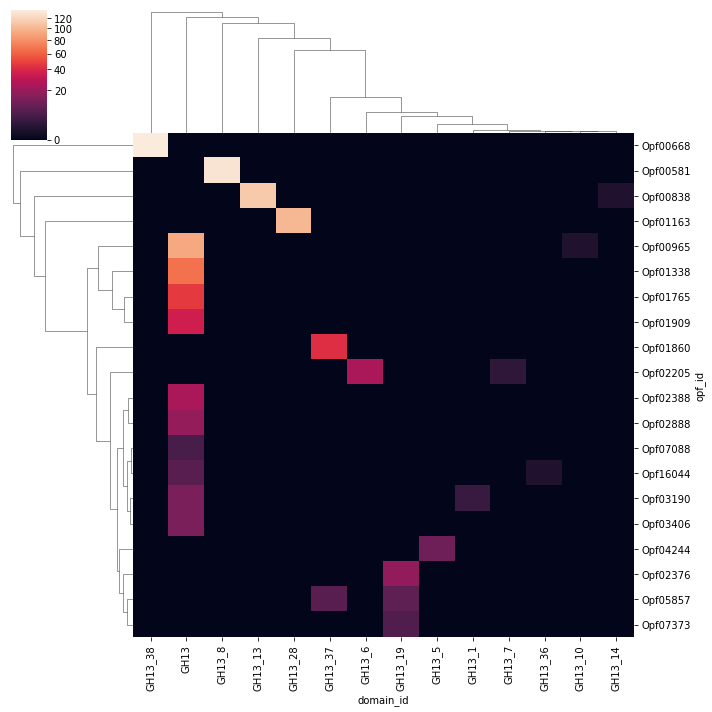

In [8]:
# GH13 domains and OPFs match very nicely.
opf_to_gh13_family_feature_counts = gh13_domain_features.groupby(['opf_id', 'domain_id']).apply(len).sort_index()

sns.clustermap(
    opf_to_gh13_family_feature_counts.unstack(fill_value=0),
    norm=mpl.colors.PowerNorm(1/2),
    yticklabels=1,
)

opf_to_gh13_family_feature_counts.unstack(fill_value=0)

In [9]:
# All examples from OPFs with even one member matching a starch-active domain

starch_domain_features = (
    pd.read_sql(r"""
        SELECT *
        FROM (
            SELECT DISTINCT opf_id
            FROM starch_active_gh_domain
            JOIN feature_x_cazy_minimal_domain USING (domain_id)
            JOIN feature_to_opf USING (feature_id)
            WHERE score > 50
        )
        LEFT JOIN feature_to_opf USING (opf_id)
        LEFT JOIN feature_x_cazy_minimal_domain USING (feature_id)
        WHERE (score > 50 AND domain_id IN starch_active_gh_domain)
           OR domain_id IS NULL
    """, con=con)
    .sort_values('feature_id')
    .dropna(subset=['opf_id'])
    .assign(domain_id=lambda x: x.domain_id.fillna('no_gh_domain'))
)

In [10]:
# A few OPFs consistently have more than one domain
two_starch_domain_features = starch_domain_features[starch_domain_features.feature_id.duplicated(keep=False)]
two_starch_domain_features

,opf_id,feature_id,domain_id,score,domain_start,domain_stop
1952,Opf05857,Amulumruptor_caecigallinarius_01351,GH13_37,192.9,1197.0,1491.0
1951,Opf05857,Amulumruptor_caecigallinarius_01351,GH13_19,376.8,176.0,565.0
1953,Opf05857,GCA_002633305_00961,GH13_19,376.8,176.0,565.0
1954,Opf05857,GCA_002633305_00961,GH13_37,190.4,1197.0,1491.0
1996,Opf05953,GCA_003979105_00419,GH119,141.7,60.0,398.0
1995,Opf05953,GCA_003979105_00419,GH119,67.3,429.0,657.0
1997,Opf05953,GCA_004102785_02308,GH119,67.1,429.0,657.0
1998,Opf05953,GCA_004102785_02308,GH119,140.4,60.0,398.0
2000,Opf05953,GCA_009774955_00093,GH119,139.1,60.0,398.0
1999,Opf05953,GCA_009774955_00093,GH119,67.8,430.0,657.0


/Users/byronsmith/anaconda3/envs/compbio/lib/python3.8/site-packages/seaborn/matrix.py:301: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  mesh = ax.pcolormesh(self.plot_data, vmin=self.vmin, vmax=self.vmax,


domain_id,GH119,GH13,GH13_1,GH13_10,GH13_13,GH13_14,GH13_19,GH13_28,GH13_36,GH13_37,GH13_38,GH13_5,GH13_6,GH13_7,GH13_8,GH31,GH57,GH77,GH97,no_gh_domain
opf_id,,,,,,,,,,,,,,,,,,,,
Opf00042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,1
Opf00307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,0,0
Opf00490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,0,0,0
Opf00581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,0,0,0,0,2
Opf00668,0,0,0,0,0,0,0,0,0,0,136,0,0,0,0,0,0,0,0,0
Opf00838,0,0,0,0,113,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Opf00965,0,93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Opf01080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,0
Opf01088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,0,0,0,2


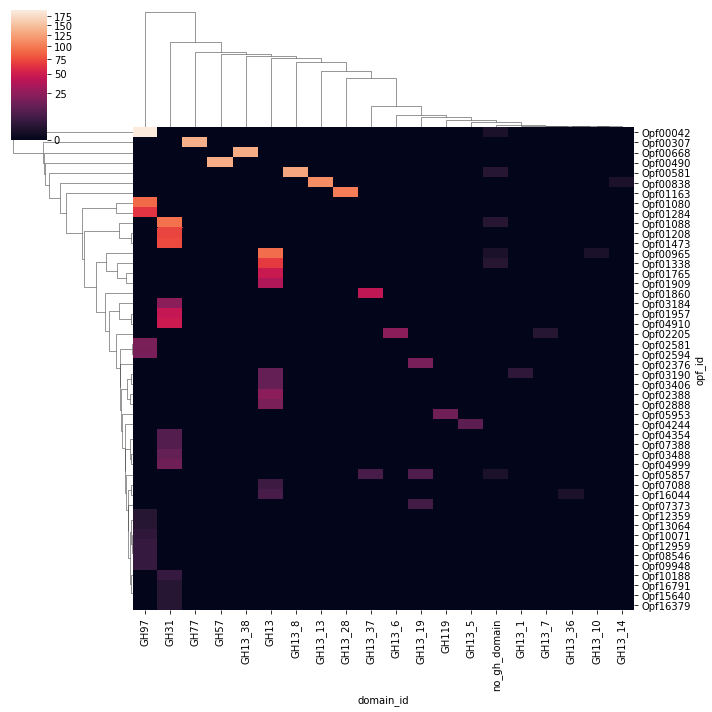

In [11]:
# Starch-active domains and OPFs match very nicely.
opf_to_starch_subfamily_feature_counts = starch_domain_features.groupby(['opf_id', 'domain_id'], dropna=False).apply(len).sort_index()

sns.clustermap(
    opf_to_starch_subfamily_feature_counts.unstack(fill_value=0),
    norm=mpl.colors.PowerNorm(1/2),
    yticklabels=1,
)

opf_to_starch_subfamily_feature_counts.unstack(fill_value=0)

/Users/byronsmith/anaconda3/envs/compbio/lib/python3.8/site-packages/seaborn/matrix.py:301: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  mesh = ax.pcolormesh(self.plot_data, vmin=self.vmin, vmax=self.vmax,


domain_id,GH13,GH13_10,GH13_14,GH13_19,GH13_28,GH13_3,GH13_36,GH13_37,GH13_38,GH13_42,GH13_5,GH13_6,GH13_7,GH13_8
opf_id,,,,,,,,,,,,,,
Opf00581,0,0,0,0,0,0,0,0,0,0,0,0,0,125
Opf00668,0,0,0,0,0,0,0,0,135,0,0,0,0,0
Opf00838,0,0,113,0,0,0,0,0,0,0,0,0,0,0
Opf00965,89,4,0,0,0,0,0,0,0,0,0,0,0,0
Opf01163,0,0,0,0,101,0,0,0,0,0,0,0,0,0
Opf01338,67,0,0,0,0,0,0,0,0,0,0,0,0,0
Opf01765,47,0,0,0,0,0,0,0,0,0,0,0,0,0
Opf01860,0,0,0,0,0,0,0,34,0,0,0,0,0,0
Opf01909,0,0,0,0,0,0,0,0,0,36,0,0,0,0


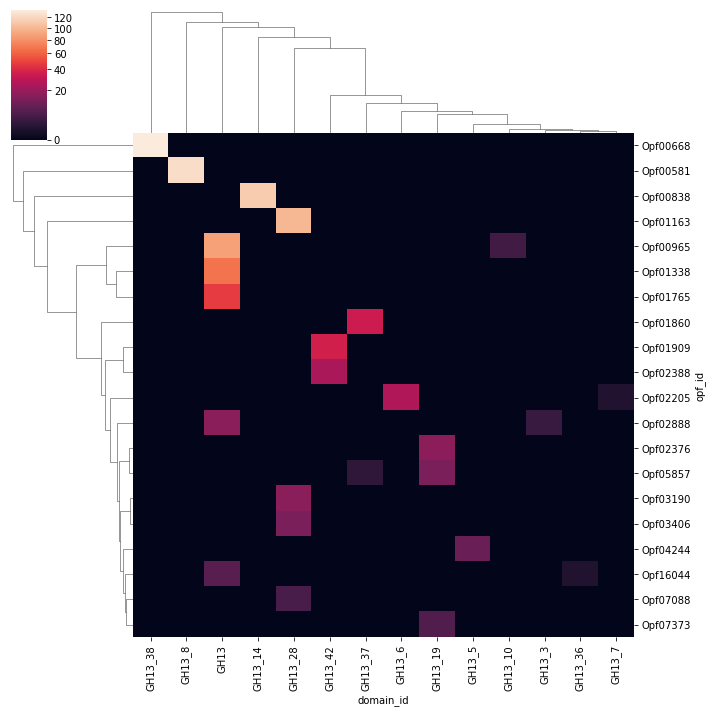

In [12]:
# (1) Collect all features with GH13 domains using the following SQL:
# SELECT feature_id
# FROM feature_x_cazy_domain
# WHERE (domain_id LIKE "GH13\_%" ESCAPE "\" OR domain_id IS "GH13")
#   AND score > 50

# (2) Take this list of feature_id and pull the AA sequences:
# echo <SCRIPT> | sqlite3 data/core.muri2.2.denorm.db | seqtk subseq data/core.a.mags.muri2.g.final.cds.fa - | pbcopy

# (3) Run this through the dbCAN meta server: <https://bcb.unl.edu/dbCAN2/blast.php>

# (4) Save the resulting table as `build/gh13_hits_subfamilies.tsv`

# (5):

def _parse_hmmer_field_to_gh13(s):
    return [t for t in s.split('(') if (t.startswith('GH13_') or t == 'GH13')]
    
dbcan_domain_assignment = (
    pd.read_table('build/gh13_hits_subfamilies.tsv')
    .rename(columns={'Gene ID': 'feature_id'})
    .assign(domain_id=lambda x: x.HMMER.apply(_parse_hmmer_field_to_gh13))
    .explode('domain_id')
    [['feature_id', 'domain_id']]
)


opf_to_dbcan_feature_counts = (
    dbcan_domain_assignment
    .set_index('feature_id')
    .join(gh13_domain_features.set_index('feature_id').opf_id)
    .groupby(['opf_id', 'domain_id'])
    .apply(len)
)

sns.clustermap(
    opf_to_dbcan_feature_counts.unstack(fill_value=0),
    norm=mpl.colors.PowerNorm(1/2),
    yticklabels=1,
)

opf_to_dbcan_feature_counts.unstack(fill_value=0)